Assuming the images are in the folder containing the python notebook.

# Contrast stretching

	
### QUESTION 1: 
Read a grey scale image (imageQ1.jpg) and perform contrast stretching to improve the quality of the image. Example shown below is a poor contrast X ray image and its contrast stretched version.


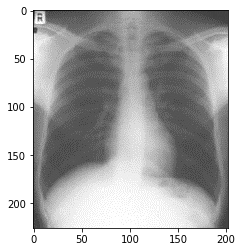

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
imgQ1 = cv2.imread("imageQ1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(imgQ1, cmap='gray', vmin=0, vmax=255 )
plt.show()

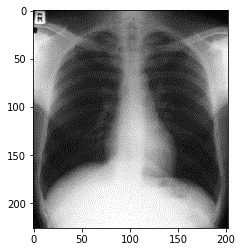

In [5]:
imgQ1_result = (imgQ1 - np.min(imgQ1)) * (255/(np.max(imgQ1) - np.min(imgQ1)))
plt.imshow(imgQ1_result, cmap="gray", vmin=0, vmax=255)
plt.show()

# Histogram 

### QUESTION 2.1 
Write a function that computes the histogram of a given grey scale image (imageQ21.jpg) and displays a plot. Better not use in-built OpenCV functions. 

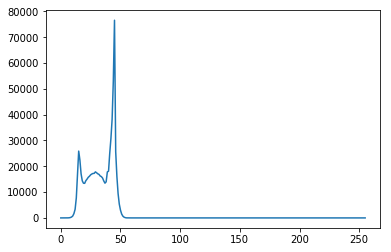

In [6]:
# Q2-1
img21 = cv2.imread("imageQ21.jpg")

imgHist = cv2.calcHist([img21],[0],None,[256],[0,255])
plt.plot(imgHist)
plt.show()

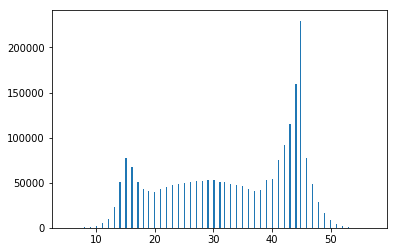

In [7]:
# or
data = list(img21[:,:].flatten())
plt.hist(data, bins=256)
plt.show()

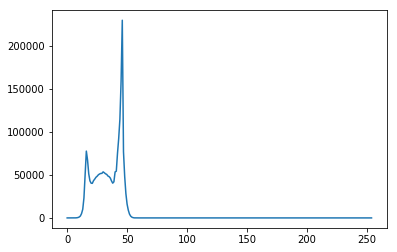

In [8]:
# without using in-built function
from bisect import bisect 
breakpoints = list(range(0,255))
def bin_data(val, breakpoints=[60, 70, 80, 90], bins=[4,3,2,1]):
        i = bisect(breakpoints, val)
        return bins[i]
    
binned = [bin_data(i,breakpoints, breakpoints) for i in data]
    
hist = np.zeros(len(breakpoints))
for i in binned:
    idx = breakpoints.index(i)
    hist[idx] += 1

plt.plot(breakpoints, hist)
plt.show()

## Histogram Equalization 

### QUESTION 2.2 
For a given image (imageQ22.tif), enhance it by applying histogram equalization.

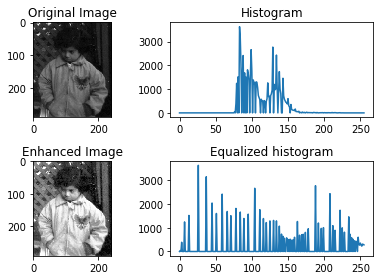

In [9]:
imgQ22 = cv2.imread('imageQ22.tif',0)
imgQ22_Hist = cv2.calcHist([imgQ22],[0],None,[256],[0,255])
equ = cv2.equalizeHist(imgQ22)
equ_Hist = cv2.calcHist([equ],[0],None,[256],[0,255])
titles = ['Original Image','Histogram','Enhanced Image','Equalized histogram']
images = [imgQ22,imgQ22_Hist,equ,equ_Hist]
plt.tight_layout()
for i in range(4):
    if i in [0,2]:
        plt.subplot(2,2,i+1)
        plt.tight_layout()
        plt.imshow(images[i],'gray')
    else:
        plt.subplot(2,2,i+1)
        plt.tight_layout()
        plt.plot(images[i])
    plt.title(titles[i])
    

# 	Image Edges

### QUESTION 3:
With the given image (imageQ3.jpg), use the Sobel operator to compute the image gradients at x and y directions. To do this, first define the 2D filters (F_x and F_y). Then perform convolution between the image and F_x to obtain the gradients at x direction, and similarly perform convolution between the image and F_y to obtain the gradients at y direction.


Text(0.5,1,'Sobel_y')

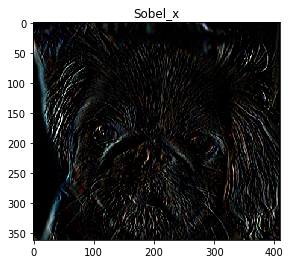

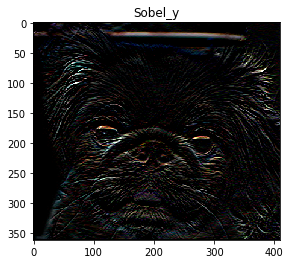

In [10]:
# Q3
img3 = cv2.imread("imageQ3.jpg")

sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(img3, -1, sobel_x)
sbl_y = cv2.filter2D(img3, -1, sobel_y)

plt.figure(1)
plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel_x")

plt.figure(2)
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel_y")

# IMAGE FILTERING

## Smoothing Filters (Low-pass Filters)

### QUESTION 4.1: 
Implement a mean filter, median filter and a gaussian filter. Perform noise removal on the given image (imageQ41.png). Try with different filters and kernel sizes, observe the variations, and find the best filter and kernel size for the noisy images.

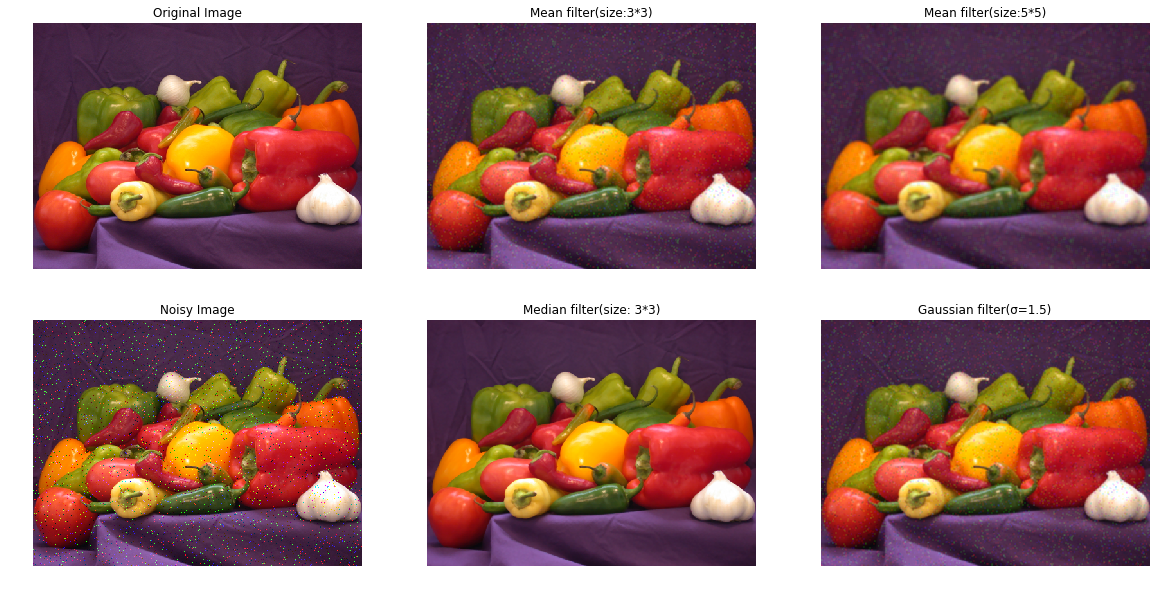

In [3]:
# Q4.1

img41 = cv2.imread("imageQ41.png") # Noisy Image
img42 = cv2.imread("imageQ42.png") # Original Image

img_mean3 = cv2.blur(img41, (3,3))
img_mean5 = cv2.blur(img41, (5,5))
img_median = cv2.medianBlur(img41, 3)
img_gaus = cv2.GaussianBlur(img41, (3,3), 1.5)

fig1 = plt.figure(figsize = (20,10))

titles = ['Original Image','Mean filter(size:3*3)','Mean filter(size:5*5)','Noisy Image','Median filter(size: 3*3)','Gaussian filter(σ=1.5)']
images = [img42,img_mean3,img_mean5,img41,img_median,img_gaus]

for i in range(6):
    ax1 = fig1.add_subplot(2,3,i+1)
    ax1.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax1.set_title(titles[i])
    ax1.set_axis_off()

## 	Image Sharpening (High-pass filters)

### QUESTION 4.2: 
Implement a high-pass filter and perform Image sharpening on a given image (imageQ42.png). (A high pass filtered image can also be obtained by subtracting the low pass filtered image from the original image).

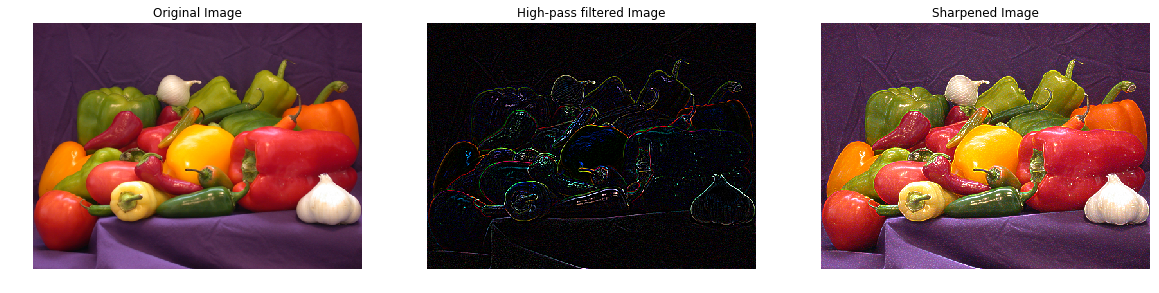

In [5]:
# Q4.2

kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
img42_highPass = cv2.filter2D(img42, -1, kernel)
img42_sharp = cv2.add(img42,img42_highPass)

titles = ['Original Image','High-pass filtered Image','Sharpened Image']
images = [img42,img42_highPass,img42_sharp]

fig2 = plt.figure(figsize = (20,10))

for i in range(3):
    ax2 = fig2.add_subplot(1,3,i+1)
    ax2.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax2.set_title(titles[i])
    ax2.set_axis_off()